<a href="https://colab.research.google.com/github/kithmiGunawardna/Hate_Speech_detection/blob/master/Hate_Speech_Detection_balanced_dataset(oversampling)_classical_ML_approches_BOW(uni_gram)_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import relevant libraraies
import pandas as pd
import numpy as np
from google.colab import drive
import re
import nltk
nltk.download('stopwords')
nltk.download('snowball_data')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.metrics import f1_score, recall_score, precision_score



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package snowball_data to /root/nltk_data...


 0 - hate speech 1 - offensive language 2 - neither

In [ ]:
#import dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Campus_Research/labeled_data.csv')

Mounted at /content/drive


In [ ]:
#df['tweet'] = df['tweet'].str.lower()  #convert tweets to lowerclass letters

In [ ]:
# # removing the users from the tweets
# import re
# import re

# # Assuming df['tweet'] is a Pandas Series
# df['tweet'] = df['tweet'].apply(lambda x: re.sub('@[^\s]+', '', str(x)))




In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# import nltk

# from nltk.stem import PorterStemmer

# nltk.download('stopwords')

# from nltk.corpus import stopwords

In [ ]:
# stop_words = set(stopwords.words('english')) #to avoid similer ones we put thrm in to a set
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     words = [stemmer.stem(word) for word in text.split() if not word.lower() in stop_words]
#     return ' '.join(words)

# df['processed_text'] = df['tweet'].apply(preprocess_text)

In [ ]:
# pattern = r'[^\w\s]'
# df['processed_text'] =df['processed_text'].replace(pattern, '', regex=True)

**cleaning dataset**

In [ ]:
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))


def clean_text(text):
  """
  This function cleans text data by removing usernames, special characters, URLs, hashtags,
  lowercaseing text, removing stopwords, and applying stemming.

  Args:
      text: The text data to be cleaned.

  Returns:
      The cleaned text data.
  """

  # Remove usernames using regular expressions
  text = re.sub(r"@\w+", "", text)  # Username pattern

  # Lowercase text
  text = str(text).lower()

  # Remove special characters, URLs, hashtags
  text = re.sub(r"\[.*?\]|https?://\S+|www\.\S+|\s+#\S+", "", text)

  # Remove punctuation
  text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)

  # Remove newline characters
  text = re.sub("\n", "", text)

  # Remove words containing numbers (e.g., "RT123")
  text = re.sub(r"\w*\d\w*", "", text)

  # Split text into words after removing stopwords
  words = [word for word in text.split() if word not in stopword]

  # Apply stemming to each word
  stemmed_words = [stemmer.stem(word) for word in words]

  # Join stemmed words back into text
  cleaned_text = " ".join(stemmed_words)

  return cleaned_text



In [ ]:
# Apply clean_text function
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt woman shouldnt complain clean hous amp man ...
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,2,3,0,3,0,1,rt dawg rt ever fuck bitch start cri confus shit
3,3,3,0,2,1,1,rt look like tranni
4,4,6,0,6,0,1,rt shit hear might true might faker bitch told ya
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lie right tl trash mine bibl scr...
24779,25292,3,0,1,2,2,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitch tellin lie


In [ ]:
df1 =df[['class', 'tweet']]
df1


,class,tweet
0,2,rt woman shouldnt complain clean hous amp man ...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,1,rt dawg rt ever fuck bitch start cri confus shit
3,1,rt look like tranni
4,1,rt shit hear might true might faker bitch told ya
...,...,...
24778,1,yous muthafin lie right tl trash mine bibl scr...
24779,2,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


 **Imbalanced dataset**

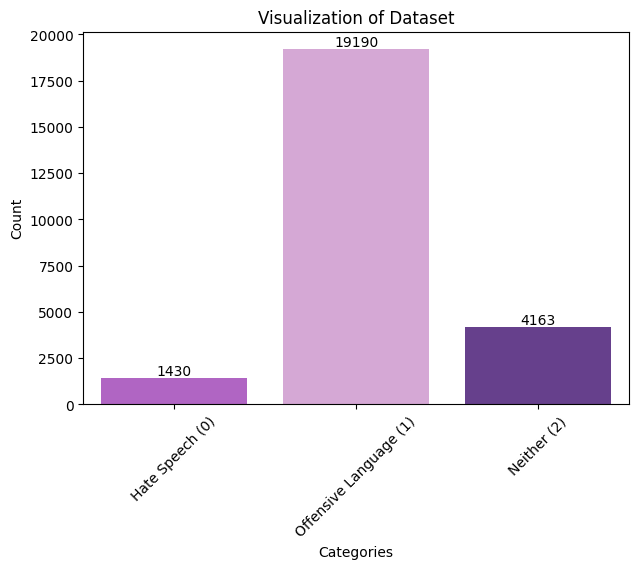

In [ ]:
# Data
category = ['Hate Speech (0)', 'Offensive Language (1)', 'Neither (2)']
count = df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

# Define a purple color palette for the bar plot
bar_colors = ['mediumorchid', 'plum', 'rebeccapurple']  # Purple shades

# Create a bar chart with Seaborn
# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Visualization of Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for bar in sns.barplot(x=category, y=value_count, palette=bar_colors).patches:
  plt.annotate(int(bar.get_height()),
              (bar.get_x() + bar.get_width() / 2, bar.get_height()),
              ha='center', va='bottom')



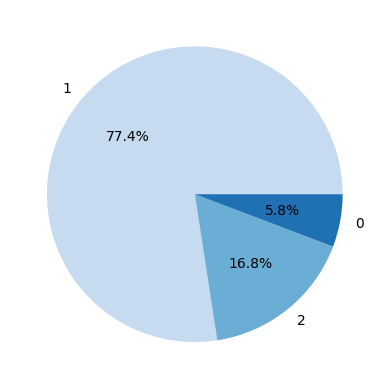

In [ ]:
blue_palette = sns.color_palette("Blues", n_colors=3)  # Customize 'n_colors' based on the number of slices

# Create a pie chart with the blue color palette
plt.pie(
    df['class'].value_counts().values,  # Values for the pie chart
    labels=df['class'].value_counts().index,  # Labels for each slice
    autopct='%1.1f%%',  # Display the percentage with one decimal place
    colors=blue_palette  # Set the color palette to shades of blue
)

# Display the pie chart
plt.show()

In [ ]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

**Balanced dataset using oversampling**

In [ ]:
#create two different dataframe of majority and minority class
df_class_1 = df[(df['class']==1)]
df_class_2 = df[(df['class']==2)]
df_class_0 = df[(df['class']==0)]
# undersample class_1 class
df_class_2_oversampled = resample(df_class_2,
                                 replace=True,    # sample with replacement
                                 n_samples= len(df_class_1), # to match majority class
                                 random_state=42)  # reproducible results
# undersample class_1 class
df_class_0_oversampled = resample(df_class_0,
                                 replace=True,    # sample with replacement
                                 n_samples= len(df_class_1), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
oversampled_df  = pd.concat([df_class_2_oversampled, df_class_0_oversampled,df_class_1])


In [ ]:
oversampled_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
5073,5223,3,0,0,3,2,nope super chocolatey yummi browni
22172,22641,3,0,0,3,2,thou shall mock ryanth futurekelli
18219,18624,3,0,0,3,2,rt trash worth
2869,2939,3,0,0,3,2,pensk run nascar yellow there sponsor alreadi
20198,20643,3,0,0,3,2,rt bird eye view today activ thank great camer...
...,...,...,...,...,...,...,...
24774,25287,3,0,3,0,1,realli care bout dis bitch dick yo feel
24775,25288,3,0,3,0,1,worri bout bitch need
24778,25291,3,0,2,1,1,yous muthafin lie right tl trash mine bibl scr...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...


In [ ]:
oversampled_df ['class'].value_counts()

class
2    19190
0    19190
1    19190
Name: count, dtype: int64

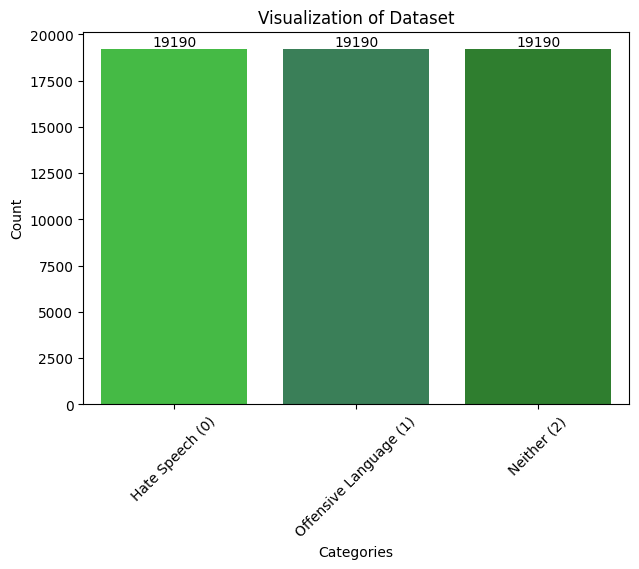

In [ ]:
# Data
category = ['Hate Speech (0)', 'Offensive Language (1)', 'Neither (2)']
count =oversampled_df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

# Define a purple color palette for the bar plot
bar_colors = ['limegreen', 'seagreen', 'forestgreen'] # green  shades

# Create a bar chart with Seaborn
# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Visualization of Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for bar in sns.barplot(x=category, y=value_count, palette=bar_colors).patches:
  plt.annotate(int(bar.get_height()),
              (bar.get_x() + bar.get_width() / 2, bar.get_height()),
              ha='center', va='bottom')




In [ ]:
y = oversampled_df['class']
x = oversampled_df.tweet

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


***using bag of word uni gram method traing the models:***



     



In [ ]:
vectorizer = CountVectorizer()
x_train_vectorizer  = vectorizer.fit_transform(x_train)
vectorizer.get_feature_names_out()
x_test_vectorizer = vectorizer.transform(x_test)

***SVM model***

In [ ]:
parameters_SVM = {'kernel':('linear', 'rbf','sigmoid','poly'), 'C':[1] ,'gamma':(['scale','float','auto'])}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters_SVM)
clf.fit(x_train_vectorizer,y_train)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [1], 'gamma': ['scale', 'float', 'auto'],
                         'kernel': ('linear', 'rbf', 'sigmoid', 'poly')})

In [ ]:
# parameters_SVM_1= {'kernel':('poly'), 'C':[1] ,'gamma':(['float','auto'])}
# svc = svm.SVC()
# clf_1 = GridSearchCV(svc, parameters_SVM_1)
# clf_1.fit(x_train_vectorizer,y_train)

In [ ]:
print(clf.cv_results_)



NameError: name 'clf' is not defined

In [ ]:
df_svc = pd.DataFrame(clf.cv_results_)


In [ ]:
df_svc

In [ ]:
df_svc[['param_C', 'param_kernel', 'params', 'mean_test_score', 'rank_test_score']]


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
SVM_output = clf.predict(x_test_vectorizer)

<Axes: >

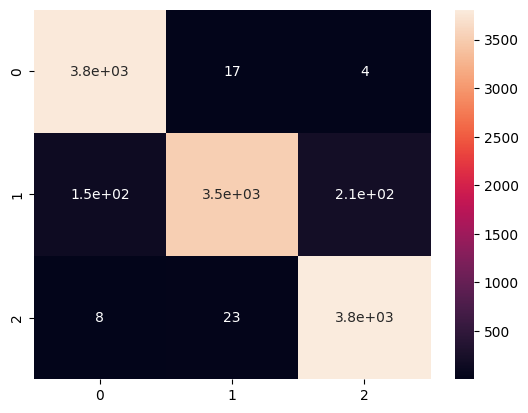

In [ ]:
y_true = y_test
y_pred = SVM_output
cm_for_SVM = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_SVM, annot=True)


In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3800
           1       0.99      0.91      0.95      3876
           2       0.95      0.99      0.97      3838

    accuracy                           0.96     11514
   macro avg       0.97      0.96      0.96     11514
weighted avg       0.97      0.96      0.96     11514



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

***Logistic Regression model***  

In [ ]:
parameters_Logistic_regression = {'solver':('lbfgs', 'liblinear','newton-cg') ,'C':[1.0,10.0],'penalty':('l1','l2','elasticnet')}
Logistic_Regression = LogisticRegression()
model = GridSearchCV(Logistic_Regression,parameters_Logistic_regression)
model.fit(x_train_vectorizer,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 10.0],
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg')})

In [ ]:
print(model.cv_results_)

{'mean_fit_time': array([3.30829620e-03, 6.67119408e-01, 3.02166939e-03, 4.99762650e+00,
       1.46100430e+00, 4.86738358e+00, 4.35290337e-03, 4.43677902e-03,
       4.30397987e-03, 4.22711372e-03, 1.07744484e+00, 3.07188034e-03,
       4.76742482e+00, 3.34579835e+00, 7.40517054e+00, 4.40354347e-03,
       4.94256020e-03, 6.79464340e-03]), 'std_fit_time': array([2.58043590e-04, 2.04632502e-02, 1.65580864e-04, 7.90806769e-01,
       4.91891563e-01, 9.45221033e-01, 1.61472763e-04, 2.71093705e-04,
       7.71320621e-05, 2.18791886e-05, 6.97599605e-02, 1.10547535e-04,
       7.94008422e-01, 9.23459866e-01, 1.17345129e+00, 3.27785209e-04,
       1.24885567e-03, 3.45422932e-03]), 'mean_score_time': array([0.        , 0.00256195, 0.        , 0.01187806, 0.00356975,
       0.00431285, 0.        , 0.        , 0.        , 0.        ,
       0.0025455 , 0.        , 0.00873032, 0.00426536, 0.00434895,
       0.        , 0.        , 0.        ]), 'std_score_time': array([0.00000000e+00, 7.85921957

In [ ]:
df_logistic_regression = pd.DataFrame(model.cv_results_)

In [ ]:
df_logistic_regression

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003308,0.000258,0.000000,0.000000,1.0,l1,lbfgs,"{'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.667119,0.020463,0.002562,0.000079,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.939535,0.940180,0.937900,0.935729,0.938117,0.938292,0.001540,7
2,0.003022,0.000166,0.000000,0.000000,1.0,l1,newton-cg,"{'C': 1.0, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,4.997626,0.790807,0.011878,0.004508,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.946157,0.948648,0.945391,0.942894,0.944306,0.945479,0.001927,6
4,1.461004,0.491892,0.003570,0.000132,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.939318,0.940180,0.938117,0.935186,0.936163,0.937793,0.001875,8
5,4.867384,0.945221,0.004313,0.000097,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.946266,0.948323,0.946043,0.943003,0.943871,0.945501,0.001883,5
6,0.004353,0.000161,0.000000,0.000000,1.0,elasticnet,lbfgs,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.004437,0.000271,0.000000,0.000000,1.0,elasticnet,liblinear,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.004304,0.000077,0.000000,0.000000,1.0,elasticnet,newton-cg,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.004227,0.000022,0.000000,0.000000,10.0,l1,lbfgs,"{'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
df_logistic_regression[['param_C'	,'param_penalty'	,'param_solver', 'params', 'mean_test_score', 'rank_test_score']]

,param_C,param_penalty,param_solver,params,mean_test_score,rank_test_score
0,1.0,l1,lbfgs,"{'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,9
1,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.938292,7
2,1.0,l1,newton-cg,"{'C': 1.0, 'penalty': 'l1', 'solver': 'newton-...",NaN,9
3,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.945479,6
4,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.937793,8
5,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.945501,5
6,1.0,elasticnet,lbfgs,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
7,1.0,elasticnet,liblinear,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
8,1.0,elasticnet,newton-cg,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
9,10.0,l1,lbfgs,"{'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,9


In [ ]:
print(model.best_params_)
print(model.best_estimator_)

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=10.0, penalty='l1', solver='liblinear')


In [ ]:
logisticregresision_output = model.predict(x_test_vectorizer)


<Axes: >

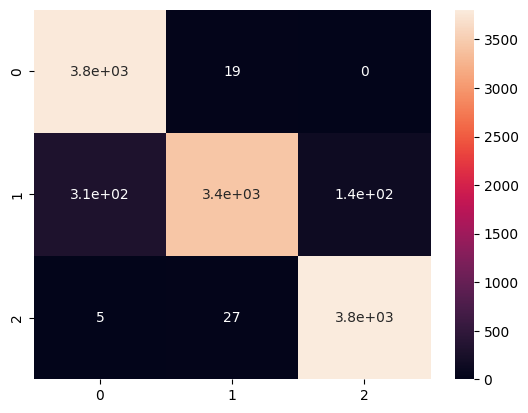

In [ ]:
y_true = y_test
y_pred = logisticregresision_output
cm_for_LogisticRegression = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_LogisticRegression, annot=True)


In [ ]:
print(classification_report(y_true, logisticregresision_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3800
           1       0.99      0.89      0.93      3876
           2       0.97      0.99      0.98      3838

    accuracy                           0.96     11514
   macro avg       0.96      0.96      0.96     11514
weighted avg       0.96      0.96      0.96     11514



***Decision Tree Classifier***

In [ ]:
parameters_decision_tree_classifier = {'criterion':('gini', 'entropy','log_loss'), 'splitter':('best','random') ,'max_features':('sqrt','log2'),'max_depth' : [3,2,100,1000,10000],'min_samples_split':[2,20,30,40],'random_state':[0,42,123]}
Dession_tree_classifiar= DecisionTreeClassifier()
clf = GridSearchCV(Dession_tree_classifiar,parameters_decision_tree_classifier )
clf.fit(x_train_vectorizer,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [3, 2, 100, 1000, 10000],
                         'max_features': ('sqrt', 'log2'),
                         'min_samples_split': [2, 20, 30, 40],
                         'random_state': [0, 42, 123],
                         'splitter': ('best', 'random')})

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([0.02963476, 0.0320106 , 0.03070068, 0.02922573, 0.03002357,
       0.02987728, 0.02979074, 0.03166256, 0.02908521, 0.02875471,
       0.02924809, 0.02918034, 0.02928534, 0.03072619, 0.02949238,
       0.02885013, 0.02966704, 0.02995491, 0.02924881, 0.03171558,
       0.02904077, 0.02921329, 0.02987871, 0.02951446, 0.01832042,
       0.01832409, 0.01788926, 0.01723824, 0.01724701, 0.01734629,
       0.01848693, 0.0178822 , 0.01758976, 0.01702027, 0.01753311,
       0.01836057, 0.01895957, 0.01656675, 0.01761003, 0.01708384,
       0.01722379, 0.01758833, 0.01968842, 0.01856627, 0.01938133,
       0.01765757, 0.01730242, 0.01756787, 0.02325134, 0.02392974,
       0.02435708, 0.02349987, 0.02553306, 0.02376704, 0.02308493,
       0.02379384, 0.02341542, 0.02397871, 0.02374282, 0.02583909,
       0.0237637 , 0.02435012, 0.02369437, 0.0235496 , 0.02532411,
       0.02387118, 0.03137727, 0.03713331, 0.03719802, 0.03695102,
       0.03761182, 0.0394197 , 0.02194996, 0

In [ ]:
df_dicision_tree = pd.DataFrame(clf.cv_results_)


In [ ]:
df_dicision_tree

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029635,0.001048,0.004380,0.000067,gini,3,sqrt,2,0,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.341945,0.340354,0.339160,0.368581,0.337640,0.345536,0.011609,469
1,0.032011,0.003397,0.004338,0.000075,gini,3,sqrt,2,0,random,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.335541,0.339920,0.344697,0.337206,0.379763,0.347425,0.016463,453
2,0.030701,0.001348,0.004413,0.000233,gini,3,sqrt,2,42,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.354212,0.349582,0.347085,0.342417,0.362501,0.351159,0.006833,433
3,0.029226,0.000723,0.004255,0.000054,gini,3,sqrt,2,42,random,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.363222,0.339377,0.339377,0.336228,0.336337,0.342908,0.010251,525
4,0.030024,0.000523,0.004240,0.000042,gini,3,sqrt,2,123,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.337929,0.355987,0.338400,0.343394,0.340680,0.343278,0.006644,493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1.840795,0.039798,0.033607,0.001087,log_loss,10000,log2,40,0,random,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.808728,0.797416,0.819672,0.813267,0.814678,0.810752,0.007527,221
716,1.517262,0.318332,0.025317,0.002894,log_loss,10000,log2,40,42,best,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.826639,0.806427,0.826078,0.822061,0.817067,0.819654,0.007450,215
717,2.050251,0.107264,0.036680,0.004681,log_loss,10000,log2,40,42,random,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.801780,0.802627,0.814027,0.828466,0.798936,0.809167,0.010937,227
718,1.430593,0.067850,0.025832,0.000943,log_loss,10000,log2,40,123,best,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.819257,0.819781,0.816958,0.820541,0.818912,0.819090,0.001199,217


In [ ]:
df_dicision_tree[['param_criterion', 'param_max_depth','param_max_features','param_min_samples_split','param_splitter', 'params', 'mean_test_score', 'rank_test_score']]

,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_splitter,params,mean_test_score,rank_test_score
0,gini,3,sqrt,2,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.345536,469
1,gini,3,sqrt,2,random,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.347425,453
2,gini,3,sqrt,2,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.351159,433
3,gini,3,sqrt,2,random,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.342908,525
4,gini,3,sqrt,2,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.343278,493
...,...,...,...,...,...,...,...,...
715,log_loss,10000,log2,40,random,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.810752,221
716,log_loss,10000,log2,40,best,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.819654,215
717,log_loss,10000,log2,40,random,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.809167,227
718,log_loss,10000,log2,40,best,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.819090,217


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'criterion': 'entropy', 'max_depth': 1000, 'max_features': 'sqrt', 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       random_state=0)


In [ ]:
decision_tree_output = clf.predict(x_test_vectorizer)

<Axes: >

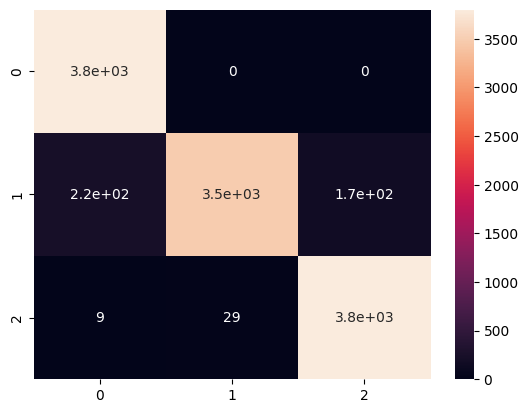

In [ ]:
y_true = y_test
y_pred =decision_tree_output
cm_for_decision_tree = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_decision_tree, annot=True)

In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3800
           1       0.99      0.90      0.94      3876
           2       0.96      0.99      0.97      3838

    accuracy                           0.96     11514
   macro avg       0.96      0.96      0.96     11514
weighted avg       0.96      0.96      0.96     11514



***passive Aggressive***

In [ ]:
parameters_passive_aggrasive ={'C':[1.0,10.0],'max_iter':[10,100,1000],'early_stopping':(True,False),'shuffle':(True,False),'loss':('str','hinge'),'n_jobs':[1,10,100,1000],'random_state':[0,42,123]}
passive_aggrasive = PassiveAggressiveClassifier()
clf = GridSearchCV(passive_aggrasive,parameters_passive_aggrasive )
clf.fit(x_train_vectorizer,y_train)

GridSearchCV(estimator=PassiveAggressiveClassifier(),
             param_grid={'C': [1.0, 10.0], 'early_stopping': (True, False),
                         'loss': ('str', 'hinge'), 'max_iter': [10, 100, 1000],
                         'n_jobs': [1, 10, 100, 1000],
                         'random_state': [0, 42, 123],
                         'shuffle': (True, False)})

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([0.00305901, 0.00287938, 0.00298567, 0.00288467, 0.00289598,
       0.00285468, 0.00286813, 0.0028666 , 0.00291996, 0.00300908,
       0.0029233 , 0.0029109 , 0.00285478, 0.0029274 , 0.00307088,
       0.00294437, 0.00293174, 0.00291171, 0.00287933, 0.00303645,
       0.00292568, 0.00296383, 0.00309596, 0.00297151, 0.00285683,
       0.00288248, 0.0031374 , 0.00297542, 0.00301752, 0.00303154,
       0.00296755, 0.00390401, 0.00362883, 0.00300288, 0.00296412,
       0.00301414, 0.00322132, 0.0030592 , 0.00300717, 0.00309315,
       0.00301576, 0.00298595, 0.00300045, 0.0031579 , 0.00304208,
       0.00310965, 0.00304217, 0.00303826, 0.00309386, 0.00306559,
       0.00302296, 0.00307174, 0.00337777, 0.00305519, 0.00299888,
       0.00295482, 0.00298982, 0.00291867, 0.00298815, 0.00294724,
       0.00290475, 0.00293932, 0.00299945, 0.00294194, 0.00294819,
       0.00294957, 0.00286932, 0.00291328, 0.00295115, 0.00306301,
       0.00315633, 0.0029232 , 0.29035187, 0

In [ ]:
df_passive_aggrasive = pd.DataFrame(clf.cv_results_)


In [ ]:
df_passive_aggrasive

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_early_stopping,param_loss,param_max_iter,param_n_jobs,param_random_state,param_shuffle,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003059,0.000192,0.000000,0.000000,1.0,True,str,10,1,0,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
1,0.002879,0.000122,0.000000,0.000000,1.0,True,str,10,1,0,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
2,0.002986,0.000146,0.000000,0.000000,1.0,True,str,10,1,42,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
3,0.002885,0.000025,0.000000,0.000000,1.0,True,str,10,1,42,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
4,0.002896,0.000088,0.000000,0.000000,1.0,True,str,10,1,123,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.787711,0.033663,0.029268,0.020914,10.0,False,hinge,1000,1000,0,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.943226,0.942894,0.944414,0.943329,0.937466,0.942266,0.002454,169
572,1.359424,0.295788,0.024947,0.022240,10.0,False,hinge,1000,1000,42,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.948328,0.950603,0.949083,0.948648,0.947563,0.948845,0.001009,33
573,0.740134,0.080686,0.035238,0.019431,10.0,False,hinge,1000,1000,42,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.943226,0.942894,0.944414,0.943329,0.937466,0.942266,0.002454,169
574,1.061577,0.056498,0.017592,0.014809,10.0,False,hinge,1000,1000,123,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.951693,0.949191,0.954185,0.947888,0.949083,0.950408,0.002259,9


In [ ]:
df_passive_aggrasive[['param_C', 'param_early_stopping','param_loss','param_max_iter','param_n_jobs','param_random_state'	,'param_shuffle', 'params', 'mean_test_score', 'rank_test_score']]

,param_C,param_early_stopping,param_loss,param_max_iter,param_n_jobs,param_random_state,param_shuffle,params,mean_test_score,rank_test_score
0,1.0,True,str,10,1,0,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
1,1.0,True,str,10,1,0,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
2,1.0,True,str,10,1,42,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
3,1.0,True,str,10,1,42,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
4,1.0,True,str,10,1,123,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
...,...,...,...,...,...,...,...,...,...,...
571,10.0,False,hinge,1000,1000,0,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.942266,169
572,10.0,False,hinge,1000,1000,42,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.948845,33
573,10.0,False,hinge,1000,1000,42,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.942266,169
574,10.0,False,hinge,1000,1000,123,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.950408,9


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1.0, 'early_stopping': False, 'loss': 'hinge', 'max_iter': 100, 'n_jobs': 1, 'random_state': 123, 'shuffle': True}
PassiveAggressiveClassifier(max_iter=100, n_jobs=1, random_state=123)


In [ ]:
passive_aggressive_output = clf.predict(x_test_vectorizer)

<Axes: >

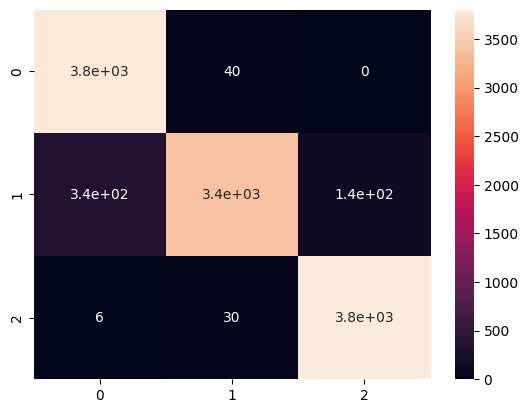

In [ ]:
y_true = y_test
y_pred = passive_aggressive_output
cm_for_passive_aggressive_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_passive_aggressive_output, annot=True)

In [ ]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3800
           1       0.98      0.88      0.93      3876
           2       0.96      0.99      0.98      3838

    accuracy                           0.95     11514
   macro avg       0.95      0.95      0.95     11514
weighted avg       0.95      0.95      0.95     11514



***Naive Bayes***

In [ ]:
parameters_Naive_Bayes ={'alpha':[1.0,10.0,100.0,1000],'fit_prior':(True,False),'class_prior':[[0.2, 0.5,0.9]]}
Naive_Bayes = MultinomialNB()
clf = GridSearchCV(estimator=Naive_Bayes, param_grid=parameters_Naive_Bayes )
# Fit the model using dense data
clf.fit( x_train_vectorizer, y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1.0, 10.0, 100.0, 1000],
                         'class_prior': [[0.2, 0.5, 0.9]],
                         'fit_prior': (True, False)})

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([0.01543021, 0.01488633, 0.01442504, 0.01433754, 0.01431203,
       0.01434236, 0.01475782, 0.01459808]), 'std_fit_time': array([0.00060288, 0.00017622, 0.00018993, 0.00016466, 0.00017631,
       0.00018836, 0.00068039, 0.00043848]), 'mean_score_time': array([0.00289712, 0.00283155, 0.00270162, 0.0026619 , 0.00266738,
       0.00269079, 0.00266018, 0.00265899]), 'std_score_time': array([1.94089687e-04, 5.92546871e-05, 3.41598499e-05, 4.56147520e-05,
       8.23622701e-05, 6.92107412e-05, 7.02956631e-05, 1.13890796e-04]), 'param_alpha': masked_array(data=[1.0, 1.0, 10.0, 10.0, 100.0, 100.0, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_class_prior': masked_array(data=[list([0.2, 0.5, 0.9]), list([0.2, 0.5, 0.9]),
                   list([0.2, 0.5, 0.9]), list([0.2, 0.5, 0.9]),
                   list([0.2, 0.5, 0.9]), list([0.2, 0.5, 0.9]),
                   list(

In [ ]:
df_navie_bayes = pd.DataFrame(clf.cv_results_)

In [ ]:
df_navie_bayes

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_class_prior,param_fit_prior,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015430,0.000603,0.002897,0.000194,1.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.905015,0.902616,0.907176,0.903485,0.901205,0.903900,0.002052,1
1,0.014886,0.000176,0.002832,0.000059,1.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.905015,0.902616,0.907176,0.903485,0.901205,0.903900,0.002052,1
2,0.014425,0.000190,0.002702,0.000034,10.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.868215,0.862339,0.864944,0.870155,0.859841,0.865099,0.003757,3
3,0.014338,0.000165,0.002662,0.000046,10.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.868215,0.862339,0.864944,0.870155,0.859841,0.865099,0.003757,3
4,0.014312,0.000176,0.002667,0.000082,100.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.792553,0.794919,0.790251,0.799370,0.787102,0.792839,0.004164,5
5,0.014342,0.000188,0.002691,0.000069,100.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.792553,0.794919,0.790251,0.799370,0.787102,0.792839,0.004164,5
6,0.014758,0.000680,0.002660,0.000070,1000,"[0.2, 0.5, 0.9]",True,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.640795,0.638584,0.636304,0.632287,0.640213,0.637637,0.003095,7
7,0.014598,0.000438,0.002659,0.000114,1000,"[0.2, 0.5, 0.9]",False,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.640795,0.638584,0.636304,0.632287,0.640213,0.637637,0.003095,7


In [ ]:
df_navie_bayes[['param_alpha'	,'param_class_prior','param_fit_prior'	, 'params', 'mean_test_score', 'rank_test_score']]

,param_alpha,param_class_prior,param_fit_prior,params,mean_test_score,rank_test_score
0,1.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.903900,1
1,1.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.903900,1
2,10.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.865099,3
3,10.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.865099,3
4,100.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.792839,5
5,100.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.792839,5
6,1000,"[0.2, 0.5, 0.9]",True,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.637637,7
7,1000,"[0.2, 0.5, 0.9]",False,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.637637,7


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9], 'fit_prior': True}
MultinomialNB(class_prior=[0.2, 0.5, 0.9])


In [ ]:
naive_bayes_output = clf.predict(x_test_vectorizer)

<Axes: >

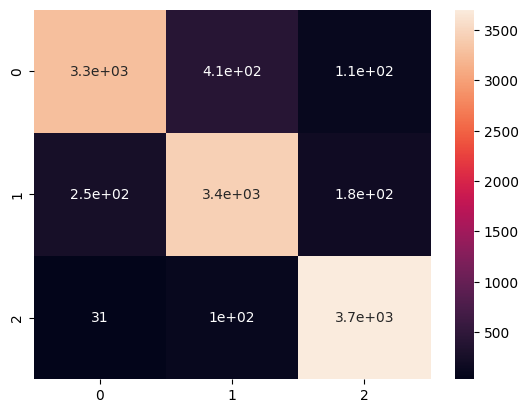

In [ ]:
y_true = y_test
y_pred = naive_bayes_output
cm_for_naive_bayes_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_naive_bayes_output, annot=True)

In [ ]:
print(classification_report(y_true,naive_bayes_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      3800
           1       0.87      0.89      0.88      3876
           2       0.93      0.96      0.95      3838

    accuracy                           0.91     11514
   macro avg       0.91      0.91      0.91     11514
weighted avg       0.91      0.91      0.91     11514



***KNN model***

In [ ]:
parameters_KNN = {'n_neighbors' : [2,3,5], 'algorithm' : ('ball_tree', 'kd_tree'), 'leaf_size' : [10,30 ,50], 'p':[1,2,3] ,'n_jobs' : [10,100,1000] }
KNN = KNeighborsClassifier()
neigh =GridSearchCV(KNN , parameters_KNN )
neigh.fit(x_train_vectorizer,y_train)


In [ ]:
print(neigh.cv_results_)

In [ ]:
df_KNN = pd.DataFrame(neigh.cv_results_)

In [ ]:
df_KNN

In [ ]:
df_KNN[['param_algorithm'	,'param_leaf_size',	'param_n_jobs'	,'param_n_neighbors'	,'param_p','params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(neigh.best_params_)
print(neigh.best_estimator_)

In [ ]:
KNN_output = neigh.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred = KNN_output
cm_for_KNN_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_KNN_output, annot=True)

In [ ]:
print(classification_report(y_true,KNN_output,labels=[0,1,2]))

***Random Forest***

In [ ]:
parameters_Random_forest ={'max_depth': [3,2,10,100,1000], 'random_state' : [0,42,123] ,'n_estimators' :[10,100,1000], 'criterion' : ('gini', 'entropy', 'log_loss') ,'min_samples_split': [2,20,30,40] , 'max_features': ('sqrt','log2',None),'bootstrap':(True,False),'n_jobs':[10,100,1000]}
Random_Forest = RandomForestClassifier()
clf =GridSearchCV(Random_Forest,parameters_Random_forest )
clf.fit(x_train_vectorizer,y_train)

In [ ]:
print(clf.cv_results_)

In [ ]:
df_Random_Forest = pd.DataFrame(clf.cv_results_)

In [ ]:
df_Random_Forest

In [ ]:
df_Random_Forest[['params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
Random_forest_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred =Random_forest_output
cm_for_Random_forest = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_Random_forest, annot=True)

In [ ]:
print(classification_report(y_true,Random_forest_output,labels=[0,1,2]))